### Random walks
Daily stock returns are notoriously hard to predict, and models often assume they follow a random walk You'll again use numpy to generate random numbers, but this time in a time series context. You'll also use the cumulative product again to create a series of prices from a series of returns

In the first example, you'll generate random numbers from the bell-shaped normal distribution. This means that values around the average are more likely than extremes, as tends to be the case with stock returns. In the second example, you will randomly select actual S&P 500 returns to then simulate S&P 500 prices.

In [2]:
#libraries
import pandas as pd 
import numpy as np
import seaborn as sns
from numpy.random import normal, seed, choice
from scipy.stats import norm
from datetime import datetime #To manually create dates
import matplotlib.pyplot as plt

#### Random walk I
You'll build your own random walk by drawing random numbers from the normal distribution with the help of numpy.

In [3]:
#Set seed to 42
seed(42)


In [4]:
#Use normal to generate 2,500 random returns with the parameters loc=.001, scale=.01 and assign this to random_walk
random_walk =normal(loc=.001,scale=.01, size=2500)
random_walk

array([ 0.00596714, -0.00038264,  0.00747689, ..., -0.0017976 ,
        0.00890372,  0.00440051])

In [5]:
#Convert random_walk to a pd.Series object and reassign it to random_walk
random_walk = pd.Series(random_walk)
random_walk

0       0.005967
1      -0.000383
2       0.007477
3       0.016230
4      -0.001342
          ...   
2495    0.009132
2496   -0.001790
2497   -0.001798
2498    0.008904
2499    0.004401
Length: 2500, dtype: float64

In [6]:
#Create random_prices by adding 1 to random_walk and calculating the cumulative product.
random_prices = random_walk.add(1).cumprod()
random_prices


0        1.005967
1        1.005582
2        1.013101
3        1.029544
4        1.028163
          ...    
2495    24.824558
2496    24.780131
2497    24.735586
2498    24.955825
2499    25.065643
Length: 2500, dtype: float64

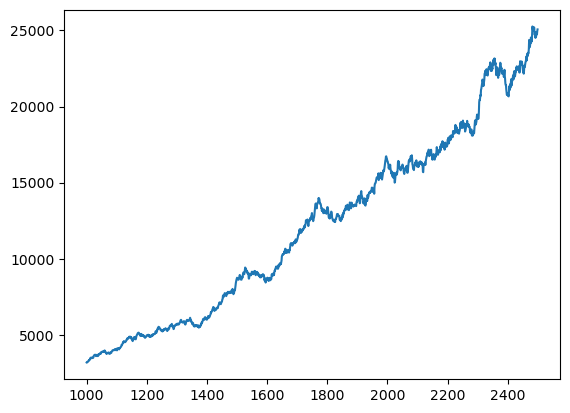

In [7]:
#Multiply random_prices by 1,000 and plot the result for a price series starting at 1,000
(random_prices.mul(1000))[1000:].plot()
plt.show()

#### Random walk II

In this exercise, you'll build a random walk using historical returns from Facebook's stock price since IPO through the end of May 31, 2017. Then you'll simulate an alternative random price path in the next exercise.

In [8]:
#import data
fb = pd.read_csv('Datasets/Stock_data-/fb.csv')
fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   2012-05-17  1266 non-null   object 
 1   38.0        1266 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.9+ KB


In [9]:
fb.columns=["date","price"]
fb.head()

,date,price
0,2012-05-18,38.23
1,2012-05-21,34.03
2,2012-05-22,31.00
3,2012-05-23,32.00
4,2012-05-24,33.03


In [10]:
fb['date'] = pd.to_datetime(fb['date'])
fb.set_index('date', inplace=True)
fb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1266 entries, 2012-05-18 to 2017-05-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   1266 non-null   float64
dtypes: float64(1)
memory usage: 19.8 KB


In [11]:
# Set seed to 42 here
seed(42)

In [12]:
#Apply .pct_change() to generate daily Facebook returns, drop missing values, and assign to daily_returns
daily_returns = fb.iloc[:,0].pct_change().dropna()

In [13]:
daily_returns

date
2012-05-21   -0.109861
2012-05-22   -0.089039
2012-05-23    0.032258
2012-05-24    0.032188
2012-05-25   -0.033909
                ...   
2017-05-24    0.013305
2017-05-25    0.012797
2017-05-26    0.001119
2017-05-30    0.001643
2017-05-31   -0.006038
Name: price, Length: 1265, dtype: float64

In [14]:
#Create a variable n_obs that contains the .count() of Facebook daily_returns.
n_obs = daily_returns.count()
n_obs

1265

In [15]:
#Use choice() to randomly select n_obs samples from daily_returns, and assign to random_walk
random_walk = choice(daily_returns, size=n_obs)
random_walk


array([-0.00837224,  0.00113402,  0.01842197, ...,  0.00298616,
       -0.00265874, -0.01866667])

In [16]:
#Convert random_walk to a pd.Series and reassign it to itself.
random_walk = pd.Series(random_walk)
type(random_walk)

pandas.core.series.Series

c:\Users\Yira\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


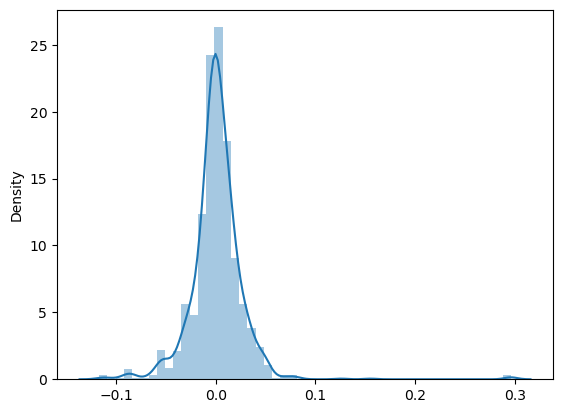

In [17]:
#Use sns.distplot() to plot the distribution of random_walk
sns.distplot(random_walk)
plt.show()

#### Random walk III
In this exercise, you'll complete your random walk simulation using Facebook stock returns over the last five years. You'll start off with a random sample of returns like the one you've generated during the last exercise and use it to create a random stock price path.

In [18]:
#Select the first Facebook price by applying .first('D') to fb.price, and assign to start
start = fb.price.first('D')
start

date
2012-05-18    38.23
Name: price, dtype: float64

In [19]:
#Add 1 to random_walk and reassign it to itself, then .append() random_walk to start and assign this to random_price
random_walk = random_walk.add(1)
random_price = start.append(random_walk)

C:\Users\Yira Yareth\AppData\Local\Temp\ipykernel_25320\2066351653.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  random_price = start.append(random_walk)


In [20]:
# Calculate cumulative product here
random_price = random_price.cumprod()

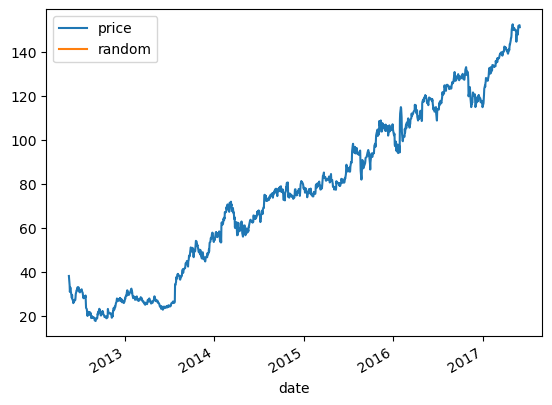

In [21]:
#Insert random_price as new column labeled random into fb and plot the result.
fb['random'] = random_price
fb.plot()
plt.show()

#### Annual return correlations among several stocks

In this exercise, we have provided you with the historical stock prices for Apple (AAPL), Amazon (AMZN), IBM (IBM), WalMart (WMT), and Exxon Mobile (XOM) for the last 4,000 trading days from July 2001 until the end of May 2017.

You'll calculate the year-end returns, the pairwise correlations among all stocks, and visualize the result as an annotated heatmap.

In [25]:
data= pd.read_csv('Datasets/Stock_data-/5_stocks.csv',parse_dates=['Date'], index_col='Date')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4001 entries, 2001-07-05 to 2017-05-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    4000 non-null   float64
 1   AMZN    4000 non-null   float64
 2   IBM     4000 non-null   float64
 3   WMT     4000 non-null   float64
 4   XOM     4000 non-null   float64
dtypes: float64(5)
memory usage: 187.5 KB


In [26]:
data.head()

,AAPL,AMZN,IBM,WMT,XOM
Date,,,,,
2001-07-05,1.66,15.27,NaN,NaN,NaN
2001-07-06,1.57,15.27,106.50,47.34,43.40
2001-07-09,1.62,15.81,104.72,48.25,43.36
2001-07-10,1.51,15.61,101.96,47.50,42.88
2001-07-11,1.61,15.34,103.85,48.85,42.48


In [27]:
#Apply .resample() with year-end frequency (alias: 'A') to data and select the .last() price from each subperiod; assign this to annual_prices
annual_prices = data.resample('A').last()
annual_prices

,AAPL,AMZN,IBM,WMT,XOM
Date,,,,,
2001-12-31,1.56,10.82,120.96,57.55,39.30
2002-12-31,1.02,18.89,77.50,50.51,34.94
2003-12-31,1.53,52.62,92.68,53.05,41.00
2004-12-31,4.60,44.29,98.58,52.82,51.26
2005-12-31,10.27,47.15,82.20,46.80,56.17
2006-12-31,12.12,39.46,97.15,46.18,76.63
2007-12-31,28.30,92.64,108.10,47.53,93.69
2008-12-31,12.19,51.28,84.16,56.06,79.83
2009-12-31,30.10,134.52,130.90,53.45,68.19


In [28]:
#Calculate annual_returns by applying .pct_change() to annual_prices
annual_returns = annual_prices.pct_change()
annual_returns

,AAPL,AMZN,IBM,WMT,XOM
Date,,,,,
2001-12-31,NaN,NaN,NaN,NaN,NaN
2002-12-31,-0.346154,0.745841,-0.359292,-0.122328,-0.110941
2003-12-31,0.500000,1.785601,0.195871,0.050287,0.173440
2004-12-31,2.006536,-0.158305,0.063660,-0.004336,0.250244
2005-12-31,1.232609,0.064574,-0.166159,-0.113972,0.095786
2006-12-31,0.180136,-0.163097,0.181873,-0.013248,0.364251
2007-12-31,1.334983,1.347694,0.112712,0.029233,0.222628
2008-12-31,-0.569258,-0.446459,-0.221462,0.179466,-0.147935
2009-12-31,1.469237,1.623245,0.555371,-0.046557,-0.145810


In [29]:
#Calculate correlations by applying .corr() to annual_returns and print the result
correlations = annual_returns.corr()
correlations

,AAPL,AMZN,IBM,WMT,XOM
AAPL,1.000000,0.208731,0.460568,-0.183553,0.336413
AMZN,0.208731,1.000000,0.346407,-0.367620,-0.133965
IBM,0.460568,0.346407,1.000000,0.155445,0.367253
WMT,-0.183553,-0.367620,0.155445,1.000000,0.178833
XOM,0.336413,-0.133965,0.367253,0.178833,1.000000


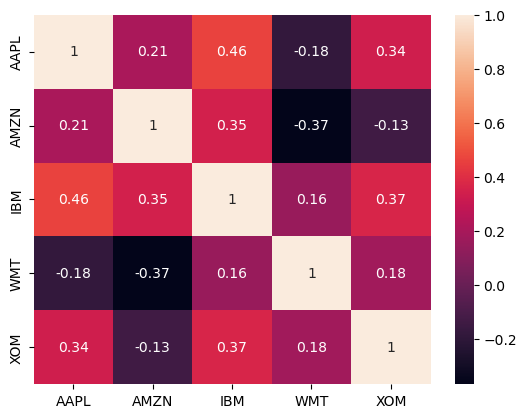

In [30]:
# Visualize the correlations as heatmap here
sns.heatmap(correlations, annot=True)
plt.show()